In [88]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import zipfile

# To do
1) Normalize data --> MinMax Scaling --> Range [0,1]
2) KNN imputation

1) Simple imputation
2) Data encoding (One Hot Encoding) --> Categorical to Numerical

3) Preprocess both train & test data

In [38]:
train_v1 = pd.read_csv("/Users/Huey.ts/Desktop/STAT_390/data/imputed_data/train.csv")

In [39]:
train_v1.head()

,Unnamed: 0,social_distancing_total_grade,social_distancing_visitation_grade,social_distancing_encounters_grade,social_distancing_travel_distance_grade,daily_state_test,precipitation,temperature,ventilator_capacity_ratio,icu_beds_ratio,...,age_45_49,age_50_54,age_55_59,age_60_64,age_65_69,age_70_74,age_75_79,age_80_84,age_85_or_higher,immigrant_student_ratio
0,0,F,F,F,F,4580.0,0.0,2.0,0.000261,0.000234,...,7,7,7,7,6,4,3,2,2,0.021048
1,1,F,F,F,F,4483.0,0.0,4.7,0.000261,0.000234,...,7,7,7,7,6,4,3,2,2,0.021048
2,2,F,F,F,F,5397.6,79.0,11.4,0.000261,0.000234,...,7,7,7,7,6,4,3,2,2,0.021048
3,3,F,F,F,F,3891.0,0.0,10.0,0.000261,0.000234,...,7,7,7,7,6,4,3,2,2,0.021048
4,4,F,F,F,F,2591.0,5.0,10.8,0.000261,0.000234,...,7,7,7,7,6,4,3,2,2,0.021048


In [40]:
train_v1 = train_v1.drop(columns = "Unnamed: 0")

In [41]:
num_cols = train_v1._get_numeric_data().columns
num_cols = num_cols.drop("index")

array([[<Axes: title={'center': 'daily_state_test'}>,
        <Axes: title={'center': 'precipitation'}>,
        <Axes: title={'center': 'temperature'}>,
        <Axes: title={'center': 'ventilator_capacity_ratio'}>,
        <Axes: title={'center': 'icu_beds_ratio'}>,
        <Axes: title={'center': 'Religious_congregation_ratio'}>,
        <Axes: title={'center': 'percent_insured'}>],
       [<Axes: title={'center': 'deaths_per_100000'}>,
        <Axes: title={'center': 'index'}>,
        <Axes: title={'center': 'county_fips'}>,
        <Axes: title={'center': 'state_fips'}>,
        <Axes: title={'center': 'covid_19_confirmed_cases'}>,
        <Axes: title={'center': 'covid_19_deaths'}>,
        <Axes: title={'center': 'total_population'}>],
       [<Axes: title={'center': 'female_percent'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'population_density'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
   

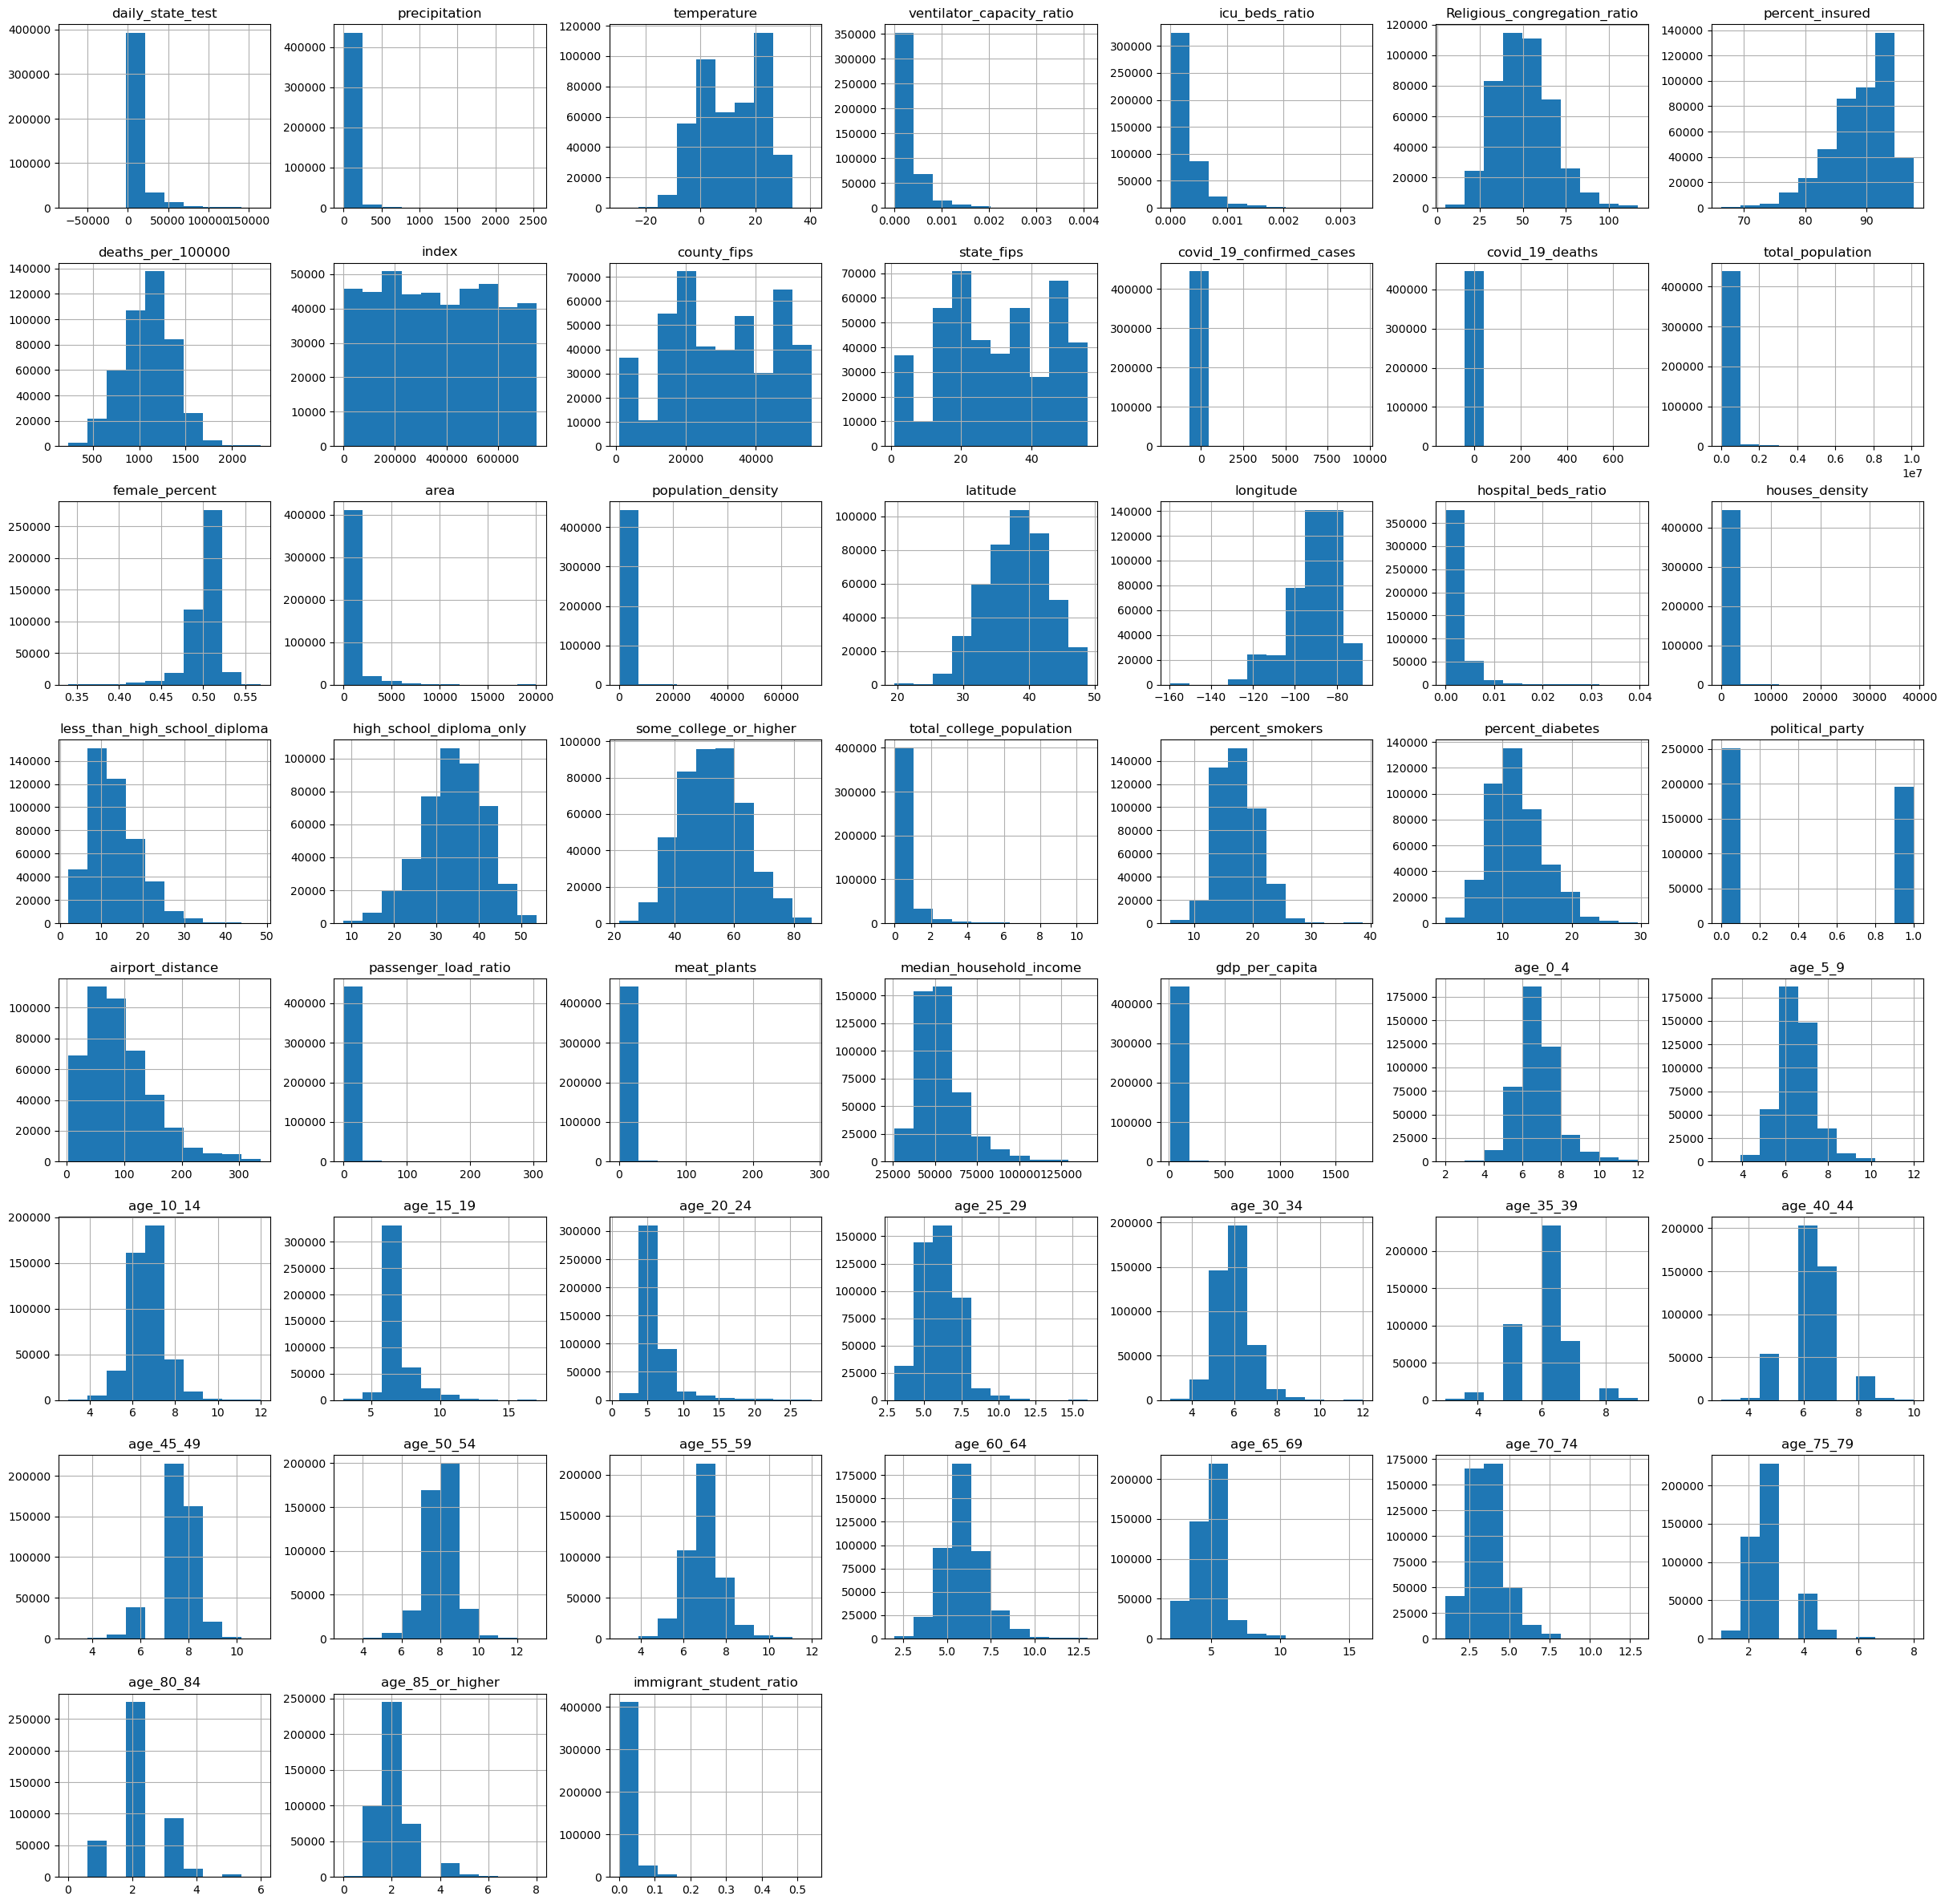

In [42]:
train_v1.hist(bins = 10, figsize = (30, 30))

# Test-Train Split (Raw)

In [125]:
data_raw = pd.read_csv("/Users/Huey.ts/Desktop/STAT_390/data/data_final/us-covid-raw-data.csv")

In [126]:
null_dat = data_raw.groupby("county_name", dropna=False).apply(lambda x: x.isnull().mean()*100)

In [127]:
null_per = data_raw.isnull().mean()*100
null_features = [null_per[null_per != 0].index]

In [128]:
counties = []
for i in null_features:
    counties.append(null_dat.iloc[np.where(null_dat[i] == 100)[0]].index)

In [129]:
counties = np.concatenate(counties)
counties = np.unique(counties)

In [130]:
new_data = data_raw.loc[~data_raw["county_name"].isin(counties)].reset_index()
new_data

,index,date,county_fips,county_name,state_fips,state_name,covid_19_confirmed_cases,covid_19_deaths,social_distancing_total_grade,social_distancing_visitation_grade,...,age_45_49,age_50_54,age_55_59,age_60_64,age_65_69,age_70_74,age_75_79,age_80_84,age_85_or_higher,immigrant_student_ratio
0,239,01/22/20,1003,Baldwin County,1,Alabama,0.0,0.0,NaN,NaN,...,7,7,7,7,6,4,3,2,2,0.021048
1,240,01/23/20,1003,Baldwin County,1,Alabama,0.0,0.0,NaN,NaN,...,7,7,7,7,6,4,3,2,2,0.021048
2,241,01/24/20,1003,Baldwin County,1,Alabama,0.0,0.0,NaN,NaN,...,7,7,7,7,6,4,3,2,2,0.021048
3,242,01/25/20,1003,Baldwin County,1,Alabama,0.0,0.0,NaN,NaN,...,7,7,7,7,6,4,3,2,2,0.021048
4,243,01/26/20,1003,Baldwin County,1,Alabama,0.0,0.0,NaN,NaN,...,7,7,7,7,6,4,3,2,2,0.021048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557821,749977,09/12/20,56037,Sweetwater County,56,Wyoming,0.0,0.0,D+,F,...,7,8,7,5,3,2,1,1,1,0.025714
557822,749978,09/13/20,56037,Sweetwater County,56,Wyoming,0.0,0.0,D+,F,...,7,8,7,5,3,2,1,1,1,0.025714
557823,749979,09/14/20,56037,Sweetwater County,56,Wyoming,0.0,0.0,D+,F,...,7,8,7,5,3,2,1,1,1,0.025714
557824,749980,09/15/20,56037,Sweetwater County,56,Wyoming,0.0,0.0,D+,F,...,7,8,7,5,3,2,1,1,1,0.025714


In [131]:
train = []
test = []

for i in new_data.county_fips.unique():
    train.append(new_data[new_data.county_fips == i].iloc[:191,:])
    test.append(new_data[new_data.county_fips == i].iloc[191:,:])
    
train = pd.concat(train)
test = pd.concat(test)

In [133]:
train = train.reset_index()
train.drop(columns = ["index"], inplace = True)

In [134]:
test = test.reset_index()
test.drop(columns = ["index"], inplace = True)

# Data Normalization

In [56]:
num_cols = train._get_numeric_data().columns
num_cols = num_cols.drop("index")

In [60]:
scaling = Pipeline([("scaling", MinMaxScaler())])
scaling_pipeline = ColumnTransformer([
    ("scaling", scaling, num_cols)
])

In [61]:
train_scaled = scaling_pipeline.fit_transform(train)

In [73]:
train_index = train.index

In [67]:
cat_cols = [i for i in train.columns.drop("index") if i not in num_cols]

In [74]:
train_scaled_merged = pd.DataFrame(train_scaled, columns = num_cols, index = train_index).merge(
train.loc[:, cat_cols], left_index=True, right_index=True)

In [75]:
train_scaled_merged

,county_fips,state_fips,covid_19_confirmed_cases,covid_19_deaths,daily_state_test,precipitation,temperature,total_population,female_percent,area,...,age_80_84,age_85_or_higher,immigrant_student_ratio,date,county_name,state_name,social_distancing_total_grade,social_distancing_visitation_grade,social_distancing_encounters_grade,social_distancing_travel_distance_grade
0,0.0,0.0,0.160553,0.147165,NaN,0.000000,0.450925,0.021548,0.767291,0.078947,...,0.333333,0.250,0.038978,01/22/20,Baldwin County,Alabama,NaN,NaN,NaN,NaN
1,0.0,0.0,0.160553,0.147165,NaN,0.000000,0.489331,0.021548,0.767291,0.078947,...,0.333333,0.250,0.038978,01/23/20,Baldwin County,Alabama,NaN,NaN,NaN,NaN
2,0.0,0.0,0.160553,0.147165,NaN,0.031102,0.584637,0.021548,0.767291,0.078947,...,0.333333,0.250,0.038978,01/24/20,Baldwin County,Alabama,NaN,NaN,NaN,NaN
3,0.0,0.0,0.160553,0.147165,NaN,0.000000,0.564723,0.021548,0.767291,0.078947,...,0.333333,0.250,0.038978,01/25/20,Baldwin County,Alabama,NaN,NaN,NaN,NaN
4,0.0,0.0,0.160553,0.147165,NaN,0.001969,0.576102,0.021548,0.767291,0.078947,...,0.333333,0.250,0.038978,01/26/20,Baldwin County,Alabama,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557773,1.0,1.0,0.160641,0.147165,0.309996,NaN,NaN,0.004233,0.636642,0.519687,...,0.166667,0.125,0.047617,07/26/20,Sweetwater County,Wyoming,D+,F,A,F
557774,1.0,1.0,0.161079,0.147165,0.310063,NaN,NaN,0.004233,0.636642,0.519687,...,0.166667,0.125,0.047617,07/27/20,Sweetwater County,Wyoming,D+,F,A,F
557775,1.0,1.0,0.161166,0.147165,0.320054,NaN,NaN,0.004233,0.636642,0.519687,...,0.166667,0.125,0.047617,07/28/20,Sweetwater County,Wyoming,D+,F,A,F
557776,1.0,1.0,0.161079,0.147165,0.315021,NaN,NaN,0.004233,0.636642,0.519687,...,0.166667,0.125,0.047617,07/29/20,Sweetwater County,Wyoming,D+,F,A,F


# One Hot Encoding Encoding

In [79]:
cat_cols_encode = ["social_distancing_total_grade", "social_distancing_visitation_grade",
            "social_distancing_encounters_grade", "social_distancing_travel_distance_grade"]

# Function

## Train

In [141]:
cat_pipeline = Pipeline([
    ("Simple imputation", SimpleImputer(missing_values = np.nan, strategy = "most_frequent")),
    ("encoding", OneHotEncoder())
])

num_pipeline = Pipeline([
    ("scaling", MinMaxScaler()),
    ("KNN imputation", KNNImputer(n_neighbors=5))
])

In [143]:
full_pipeline = ColumnTransformer([
                    ("cat", cat_pipeline, cat_cols_encode),
                    ("num", num_pipeline, num_cols)
])

In [144]:
train_preprocessed = full_pipeline.fit_transform(train)

In [151]:
column_names = full_pipeline.get_feature_names_out()

In [156]:
train_imputed = train.loc[:, ["date", "county_name", "state_name"]].merge(
    pd.DataFrame(train_preprocessed, columns = column_names, index = train.index)
    ,left_index=True, right_index=True)

In [159]:
train_imputed

,date,county_name,state_name,cat__social_distancing_total_grade_A,cat__social_distancing_total_grade_A-,cat__social_distancing_total_grade_B,cat__social_distancing_total_grade_B+,cat__social_distancing_total_grade_B-,cat__social_distancing_total_grade_C,cat__social_distancing_total_grade_C+,...,num__age_45_49,num__age_50_54,num__age_55_59,num__age_60_64,num__age_65_69,num__age_70_74,num__age_75_79,num__age_80_84,num__age_85_or_higher,num__immigrant_student_ratio
0,01/22/20,Baldwin County,Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.4,0.444444,0.454545,0.285714,0.250000,0.285714,0.333333,0.250,0.038978
1,01/23/20,Baldwin County,Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.4,0.444444,0.454545,0.285714,0.250000,0.285714,0.333333,0.250,0.038978
2,01/24/20,Baldwin County,Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.4,0.444444,0.454545,0.285714,0.250000,0.285714,0.333333,0.250,0.038978
3,01/25/20,Baldwin County,Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.4,0.444444,0.454545,0.285714,0.250000,0.285714,0.333333,0.250,0.038978
4,01/26/20,Baldwin County,Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.4,0.444444,0.454545,0.285714,0.250000,0.285714,0.333333,0.250,0.038978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445789,07/26/20,Sweetwater County,Wyoming,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.5,0.444444,0.272727,0.071429,0.083333,0.000000,0.166667,0.125,0.047617
445790,07/27/20,Sweetwater County,Wyoming,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.5,0.444444,0.272727,0.071429,0.083333,0.000000,0.166667,0.125,0.047617
445791,07/28/20,Sweetwater County,Wyoming,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.5,0.444444,0.272727,0.071429,0.083333,0.000000,0.166667,0.125,0.047617
445792,07/29/20,Sweetwater County,Wyoming,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.5,0.444444,0.272727,0.071429,0.083333,0.000000,0.166667,0.125,0.047617


## Test

In [163]:
test_preprocessed = full_pipeline.transform(test)

In [164]:
test_imputed = test.loc[:, ["date", "county_name", "state_name"]].merge(
    pd.DataFrame(test_preprocessed, columns = column_names, index = test.index)
    ,left_index=True, right_index=True)

# Exported to CSV

In [166]:
with zipfile.ZipFile("/Users/Huey.ts/Desktop/STAT_390/data/Preprocessed_Data.zip", 'w', compression=zipfile.ZIP_DEFLATED) as z:
    with z.open('train.csv', 'w') as f:
        train_imputed.to_csv(f)
    with z.open('test.csv', 'w') as f:
        test_imputed.to_csv(f)